<a href="https://colab.research.google.com/github/JRaygoza31/LSTN-CNN/blob/main/local_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenamiento Federado - Notebook de entrenamiento

In [10]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import h5py
from sklearn.metrics import classification_report
from TheModel import build
from tqdm import tqdm

ModuleNotFoundError: No module named 'TheModel'

### Importar librerias

### Importar datos locales

Para esto, se cargaran los datos locales dentro del archivo de `datos.csv` y la carpeta `data`

In [15]:
n = 4 #index de archivo a utilizar
with h5py.File(f'data/datos_{n}.h5','r') as hf:
    X = hf['data_X'][:]
    y = hf['labels_y'][:]
    data = (X,y)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'data/datos_4.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
X.shape,y.shape

((12000, 28, 28, 1), (12000,))

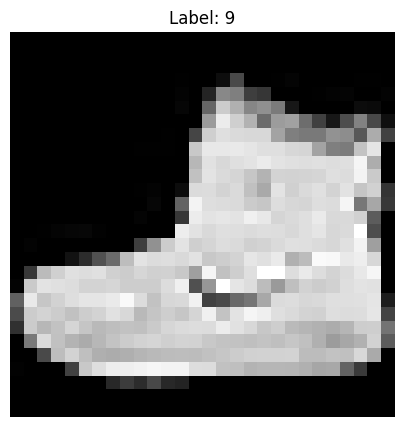

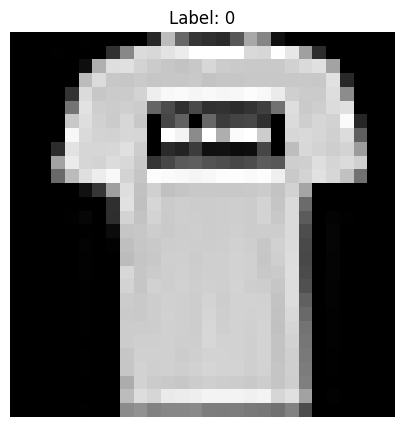

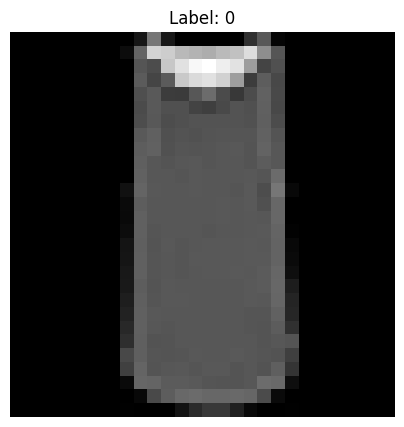

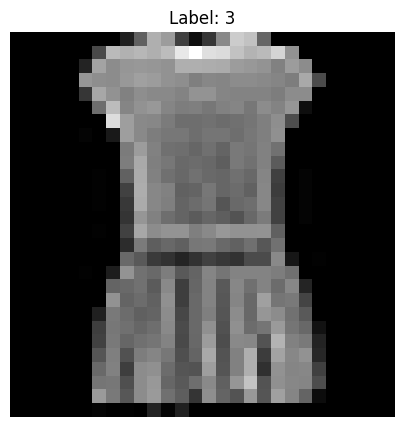

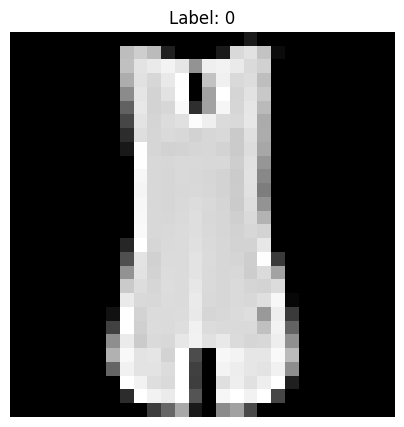

In [ ]:
for i in range(5):
    image = X[i].squeeze() #Quitamos el canal de color
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

    plt.show()

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# ## Data split para simular cinco datos aparte.

# skf = StratifiedKFold(n_splits=5)

# folds = skf.split(x_train, y_train)

# local_data = [(x_train[tsix], y_train[tsix]) for trix, tsix in folds]

# for i,x in enumerate(local_data):
#     print(len(x[0]))
#     print(f"Frecuencia de números: { {int(y):list(x[1]).count(y) for y in set(x[1])} }")
#     print(f"Primeros ejemplos (labels): {[int(y) for y in list(x[1])[:15]]}")
#     #Utiliza el siguiente snippet para guardar los datos divididos
#     """
#     with h5py.File(f'data/datos_{i}.h5','w') as hf:
#         hf.create_dataset('data_X', data=x[0])
#         hf.create_dataset('labels_y', data=x[1])
#     """

In [ ]:

def train_and_verify(local_model, X_train, y_train,epochs, x_test, y_test, save_name):

    print(local_model)

    history = local_model.fit(X_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
    y_pred = local_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    local_model.save(save_name)

### Datos 0 - Ruben Dario Castro Terrazas

<Functional name=functional, built=True>
Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.2939 - loss: 1.9477 - val_accuracy: 0.6921 - val_loss: 0.8487
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7119 - loss: 0.7948 - val_accuracy: 0.7242 - val_loss: 0.7252
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7323 - loss: 0.7082 - val_accuracy: 0.7408 - val_loss: 0.6899
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7553 - loss: 0.6483 - val_accuracy: 0.7629 - val_loss: 0.6632
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7761 - loss: 0.6076 - val_accuracy: 0.7683 - val_loss: 0.6141
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7879 - loss: 0.5767 - val_accuracy: 0.7771 - val_loss: 0.6098
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7957 - loss: 0.5490 - val_accuracy: 0.7900 - val_loss: 0.5790
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - a

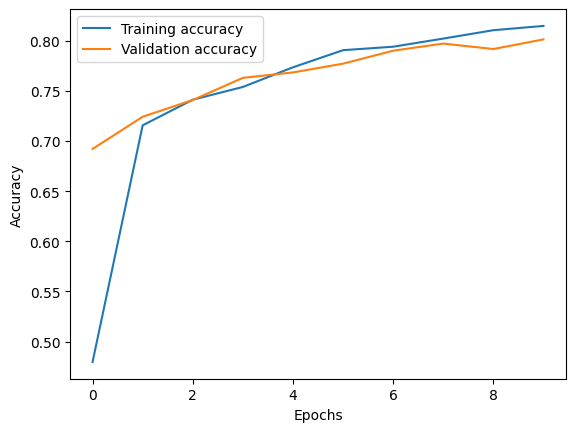

In [ ]:
# Entrenamientos local
local_model = build.build_it()

train_and_verify(local_model, X_train,y_train, 10, X_test, y_test, f"models/lmodel_{n}.keras")

### Datos 1 - Christian

<Sequential name=sequential_2, built=True>
Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6180 - loss: 1.1133 - val_accuracy: 0.7821 - val_loss: 0.6075
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8140 - loss: 0.5157 - val_accuracy: 0.8325 - val_loss: 0.4772
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8415 - loss: 0.4334 - val_accuracy: 0.8254 - val_loss: 0.4866
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8681 - loss: 0.3679 - val_accuracy: 0.8492 - val_loss: 0.4089
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8804 - loss: 0.3378 - val_accuracy: 0.8475 - val_loss: 0.4096
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.53      0.67       240
           1       0.96      0.98      0.97       240
           2       0.80      0.70      0.75       240
           3       0.90      0.85      0.88       240
          

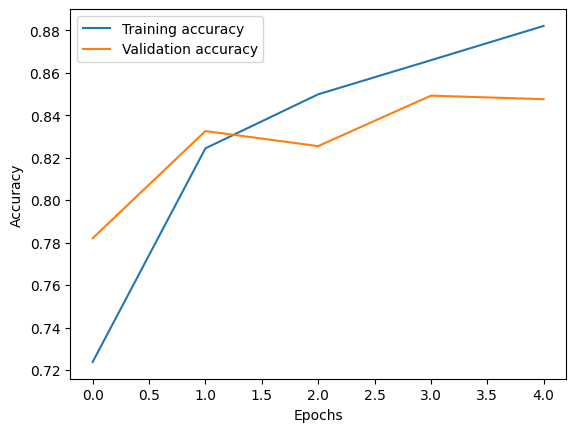

In [ ]:
# Entrenamientos local
local_model = build.build_it()
train_and_verify(local_model, X_train,y_train, 10, X_test, y_test, f"models/lmodel_{n}.keras")

### Datos 2 - Pedro

<Sequential name=sequential_2, built=True>
Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6180 - loss: 1.1133 - val_accuracy: 0.7821 - val_loss: 0.6075
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8140 - loss: 0.5157 - val_accuracy: 0.8325 - val_loss: 0.4772
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8415 - loss: 0.4334 - val_accuracy: 0.8254 - val_loss: 0.4866
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8681 - loss: 0.3679 - val_accuracy: 0.8492 - val_loss: 0.4089
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8804 - loss: 0.3378 - val_accuracy: 0.8475 - val_loss: 0.4096
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.53      0.67       240
           1       0.96      0.98      0.97       240
           2       0.80      0.70      0.75       240
           3       0.90      0.85      0.88       240
          

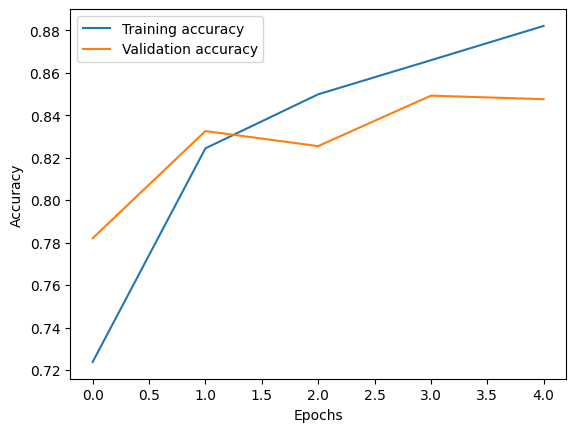

In [ ]:
# Entrenamientos local
local_model = build.build_it()
train_and_verify(local_model, X_train,y_train, 10, X_test, y_test, f"models/lmodel_{n}.keras")

### Datos 3 - Andres

<Sequential name=sequential_2, built=True>
Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6180 - loss: 1.1133 - val_accuracy: 0.7821 - val_loss: 0.6075
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8140 - loss: 0.5157 - val_accuracy: 0.8325 - val_loss: 0.4772
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8415 - loss: 0.4334 - val_accuracy: 0.8254 - val_loss: 0.4866
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8681 - loss: 0.3679 - val_accuracy: 0.8492 - val_loss: 0.4089
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8804 - loss: 0.3378 - val_accuracy: 0.8475 - val_loss: 0.4096
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.53      0.67       240
           1       0.96      0.98      0.97       240
           2       0.80      0.70      0.75       240
           3       0.90      0.85      0.88       240
          

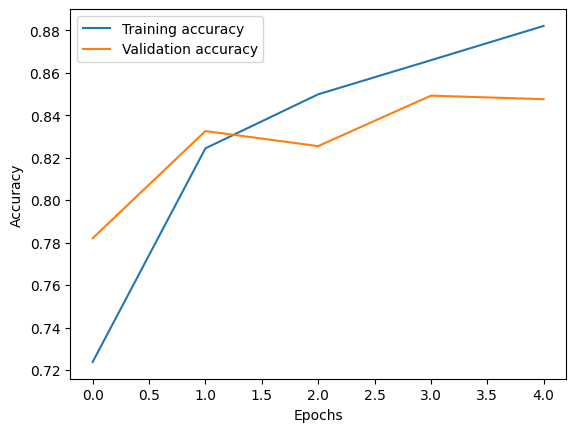

In [ ]:
# Entrenamientos local
local_model = build.build_it()
train_and_verify(local_model, X_train,y_train, 10, X_test, y_test, f"models/lmodel_{n}.keras")

### Datos 4 - Jose Raygoza

<Sequential name=sequential_2, built=True>
Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6180 - loss: 1.1133 - val_accuracy: 0.7821 - val_loss: 0.6075
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8140 - loss: 0.5157 - val_accuracy: 0.8325 - val_loss: 0.4772
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8415 - loss: 0.4334 - val_accuracy: 0.8254 - val_loss: 0.4866
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8681 - loss: 0.3679 - val_accuracy: 0.8492 - val_loss: 0.4089
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8804 - loss: 0.3378 - val_accuracy: 0.8475 - val_loss: 0.4096
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.53      0.67       240
           1       0.96      0.98      0.97       240
           2       0.80      0.70      0.75       240
           3       0.90      0.85      0.88       240
          

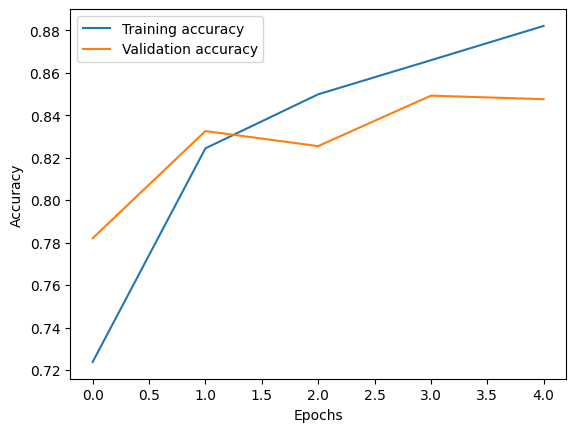

In [ ]:
# Entrenamientos local
local_model = build.build_it()
train_and_verify(local_model, X_train,y_train, 10, X_test, y_test, f"models/lmodel_{n}.keras")